**Using In-Built Function**

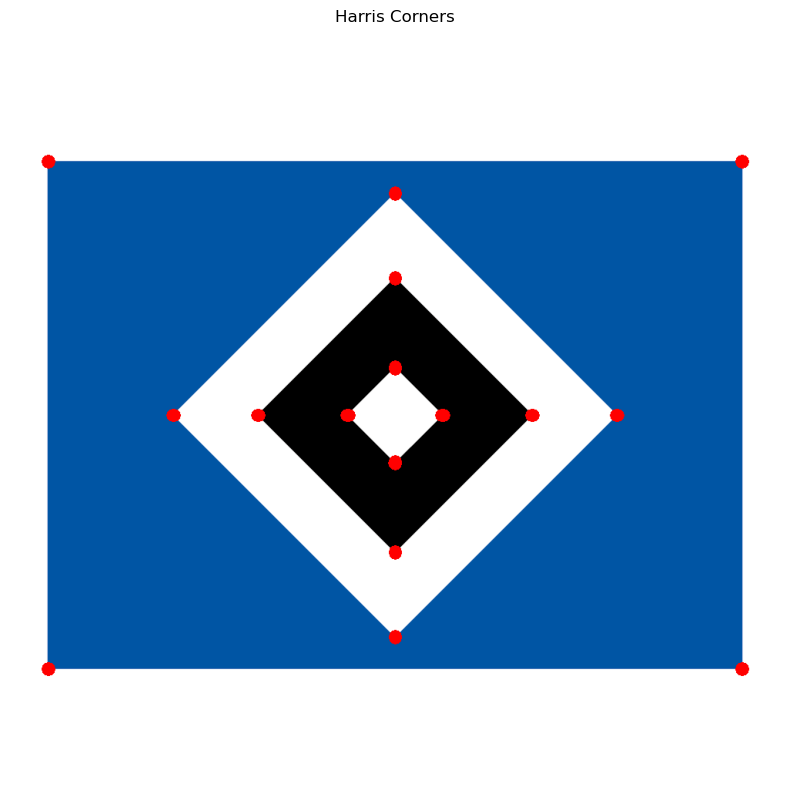

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('D:hsv.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

threshold = 0.01 * dst.max()
corners = dst > threshold

img_marked = img.copy()

corner_coords = np.argwhere(corners)

for y, x in corner_coords:
    cv2.circle(img_marked, (x, y), radius=7, color=(0, 0, 255), thickness=-1) 

img_rgb = cv2.cvtColor(img_marked, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.title('Harris Corners')
plt.axis('off')
plt.show()


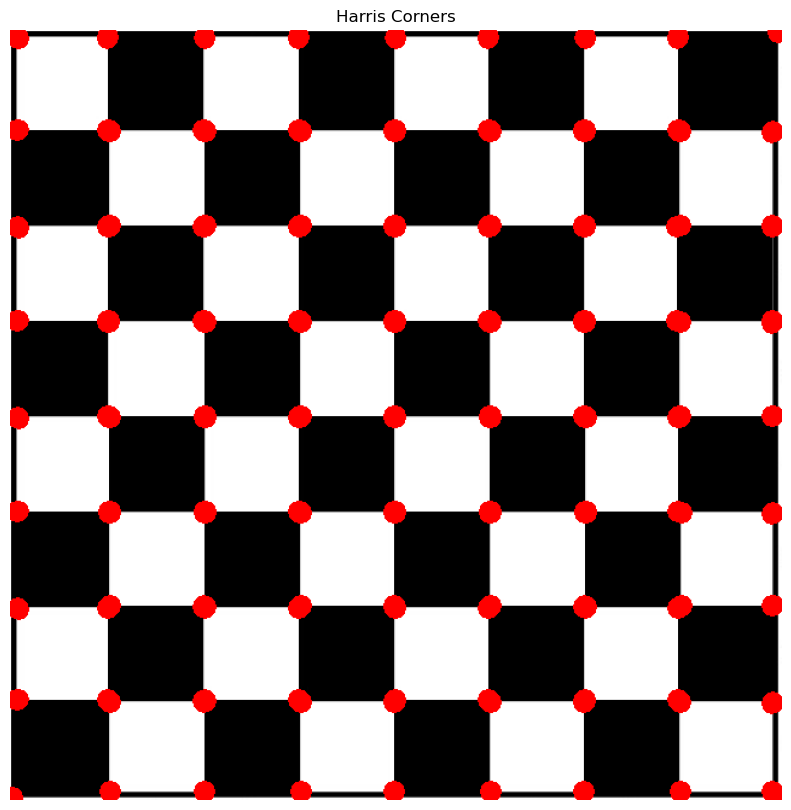

In [5]:
img = cv2.imread('D:chess.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

threshold = 0.01 * dst.max()
corners = dst > threshold

img_marked = img.copy()

corner_coords = np.argwhere(corners)

for y, x in corner_coords:
    cv2.circle(img_marked, (x, y), radius=7, color=(0, 0, 255), thickness=-1) 

img_rgb = cv2.cvtColor(img_marked, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.title('Harris Corners')
plt.axis('off')
plt.show()

**Without In-Built Function**

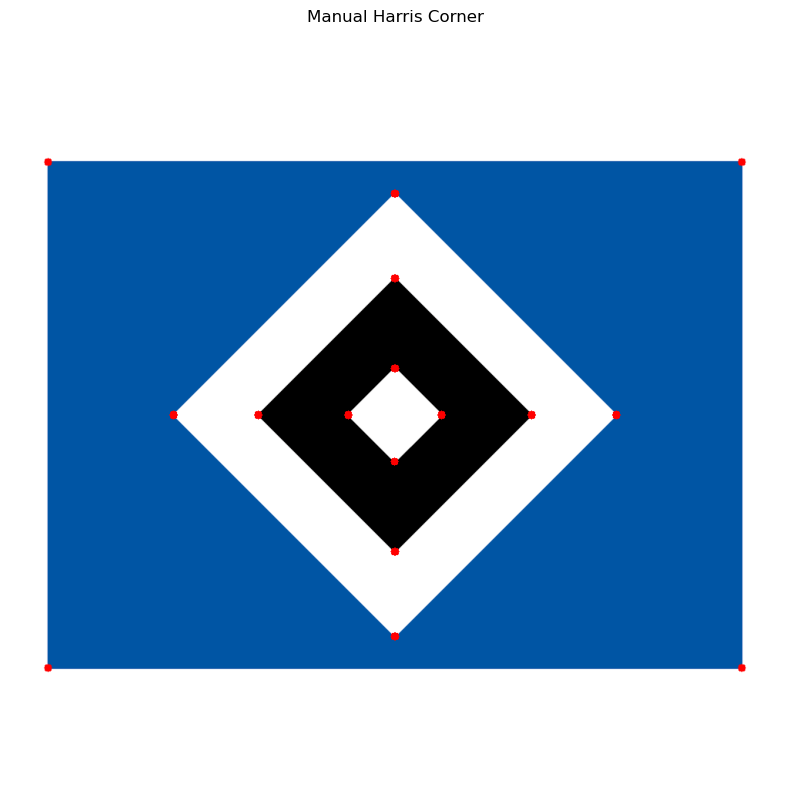

In [3]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

# Step 1: Gray scale image
img_gray = cv2.imread('D:hsv.png', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('D:hsv.png')
img_blur = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=1)

# Step 2: Compute image gradients 
Ix = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)

# Step 3:  products of derivatives
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

# Step 4: Apply Gaussian Filter
Sxx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
Syy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
Sxy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

# Step 5: Compute Harris corner response
k = 0.04
R = (Sxx * Syy - Sxy**2) - k * (Sxx + Syy)**2

# Step 6: Thresholding
threshold = 0.01 * R.max()

# Step 7:  Non-Maximum Suppression 
R_max = maximum_filter(R, size=3)  # Get local maxima
corner_coords = np.argwhere((R == R_max) & (R > threshold))  

for y, x in corner_coords:
    cv2.circle(img_color, (x, y), radius=5, color=(0, 0, 255), thickness=-1)

img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Manual Harris Corner')
plt.axis('off')
plt.show()



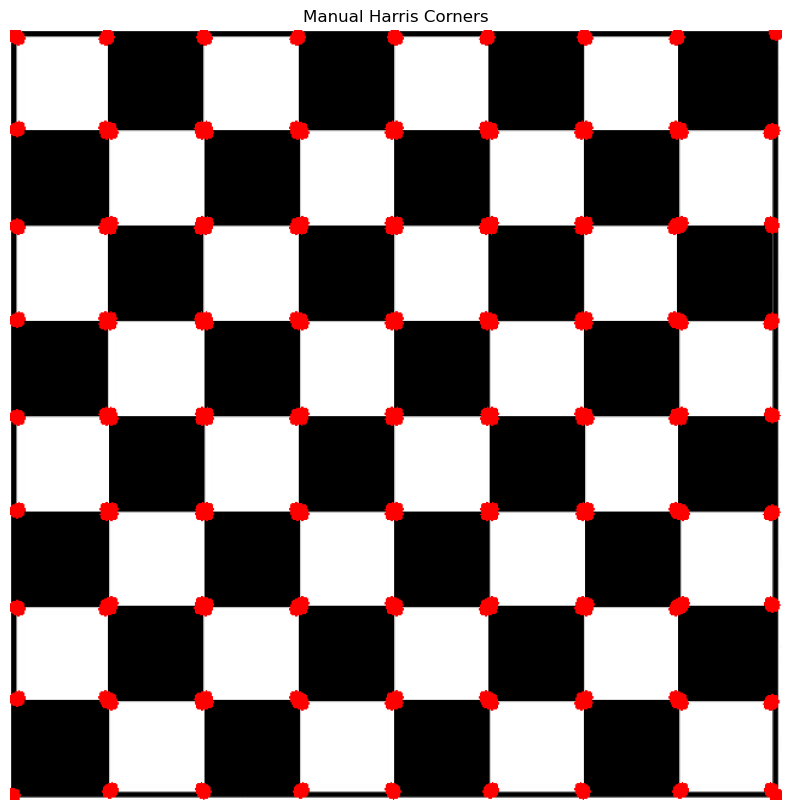

In [27]:

img_gray = cv2.imread('D:chess.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('D:chess.jpg')  

img_blur = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=1)
Ix = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy
Sxx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
Syy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
Sxy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

k = 0.04
R = (Sxx * Syy - Sxy**2) - k * (Sxx + Syy)**2

threshold = 0.01 * R.max()
corner_coords = np.argwhere(R > threshold)

for y, x in corner_coords:
    cv2.circle(img_color, (x, y), radius=5, color=(0, 0, 255), thickness=-1)

img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Manual Harris Corners')
plt.axis('off')
plt.show()